In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!unzip  "/content/drive/MyDrive/315_Birds_Species.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/VARIED THRUSH/029.jpg  
  inflating: train/VARIED THRUSH/030.jpg  
  inflating: train/VARIED THRUSH/031.jpg  
  inflating: train/VARIED THRUSH/032.jpg  
  inflating: train/VARIED THRUSH/033.jpg  
  inflating: train/VARIED THRUSH/034.jpg  
  inflating: train/VARIED THRUSH/035.jpg  
  inflating: train/VARIED THRUSH/036.jpg  
  inflating: train/VARIED THRUSH/037.jpg  
  inflating: train/VARIED THRUSH/038.jpg  
  inflating: train/VARIED THRUSH/039.jpg  
  inflating: train/VARIED THRUSH/040.jpg  
  inflating: train/VARIED THRUSH/041.jpg  
  inflating: train/VARIED THRUSH/042.jpg  
  inflating: train/VARIED THRUSH/043.jpg  
  inflating: train/VARIED THRUSH/044.jpg  
  inflating: train/VARIED THRUSH/045.jpg  
  inflating: train/VARIED THRUSH/046.jpg  
  inflating: train/VARIED THRUSH/047.jpg  
  inflating: train/VARIED THRUSH/048.jpg  
  inflating: train/VARIED THRUSH/049.jpg  
  inflating: train/VARIED THRUSH/050.jpg  
  i

In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

In [23]:
train_directory='/content/train'
val_directory='/content/valid'
test_directory='/content/test'
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [24]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [25]:
train_generator.class_indices

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALD IBIS': 17,
 'BALI STARLING': 18,
 'BALTIMORE ORIOLE': 19,
 'BANANAQUIT': 20,
 'BANDED BROADBILL': 21,
 'BANDED PITA': 22,
 'BAR-TAILED GODWIT': 23,
 'BARN OWL': 24,
 'BARN SWALLOW': 25,
 'BARRED PUFFBIRD': 26,
 'BAY-BREASTED WARBLER': 27,
 'BEARDED BARBET': 28,
 'BEARDED BELLBIRD': 29,
 'BEARDED REEDLING': 30,
 'BELTED KINGFISHER': 31,
 'BIRD OF PARADISE': 32,
 'BLACK & YELLOW bROADBILL': 33,
 'BLACK BAZA': 34,
 'BLACK FRANCOLIN': 35,
 'BLACK SKIMMER': 36,
 'BLACK SWAN': 37,
 'BLACK TAIL CRAKE': 38,
 'BLACK THROATED BUSHTIT': 39,
 'BLACK THROATED WARBLER': 40,
 'BLACK VULTURE': 41,
 'BLACK-CAP

In [26]:
from keras.applications import resnet
ResNet = resnet.ResNet101
convlayer=ResNet(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

In [27]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_3 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                      

In [28]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
180/180 [==============================] - 554s 3s/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0032
Epoch 2/5
180/180 [==============================] - 539s 3s/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0032
Epoch 3/5
180/180 [==============================] - 539s 3s/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0032
Epoch 4/5
180/180 [==============================] - 539s 3s/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0032
Epoch 5/5
180/180 [==============================] - 539s 3s/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0032


In [30]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data=val_generator,
         epochs=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


180/180 [==============================] - 561s 3s/step - loss: nan - accuracy: 0.0030 - val_loss: nan - val_accuracy: 0.0032


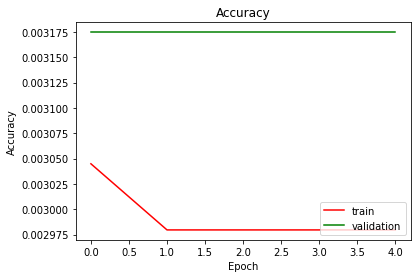

In [34]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

In [33]:
model.evaluate(test_gemerator)

7/7 [==============================] - 17s 2s/step - loss: nan - accuracy: 0.0032


[nan, 0.0031746032182127237]

In [18]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    probability=np.argmax(answer,axis=1)
    #print ('Bird Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances of correct classification')

[1]  % chances of correct classification


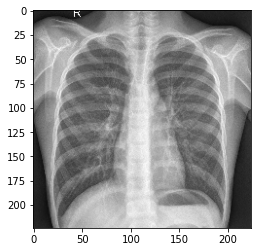

In [19]:
img='/content/test/BELTED KINGFISHER/1.jpg'
pic=load_img('/content/test/BELTED KINGFISHER/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

[1]  % chances of correct classification


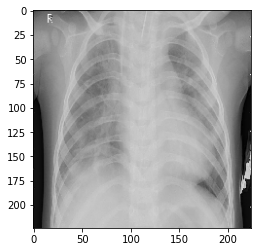

In [20]:
img='/content/test/ALBATROSS/3.jpg'
pic=load_img('/content/test/ALBATROSS/3.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)